**Data Aggregation and Group Operations**

* Categorizar un conjunto de datos y aplicar una función a cada grupo, ya sea una agregación o una transformación, suele ser un componente fundamental del flujo de trabajo de un análisis de datos. 

* Después de cargar, fusionar y preparar un conjunto de datos, una tarea familiar es calcular estadísticas de grupo o posiblemente tablas dinámicas para fines de presentación de informes o visualización. pandas proporciona una función groupby flexible y de alto rendimiento, lo que le permite cortar y dividir, y resumir conjuntos de datos de una manera natural.

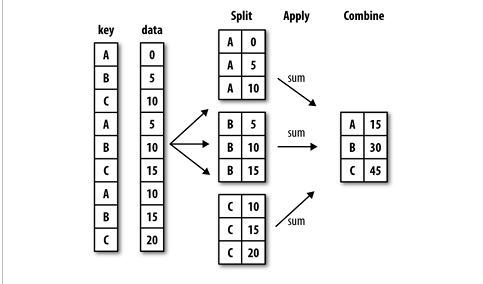

Cada clave de agrupación puede adoptar diversas formas, y no es necesario que todas las claves sean del mismo tipo:

 - Una lista o matriz de valores de la misma longitud que el eje que se está agrupando
 - Un valor que indica el nombre de una columna en un DataFrame

- Un dict o Serie que indique una correspondencia entre los valores del eje que se está agrupados y los nombres de los grupos

 - Una función que se invocará en el índice del eje o en las etiquetas individuales del índice

In [22]:
import numpy as np
import pandas as pd

In [30]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                'key2' : ['one', 'two', 'one', 'two', 'one'],
                'data1' : np.random.randn(5),
                'data2' : np.random.randn(5)})

df

,key1,key2,data1,data2
0,a,one,-0.506118,3.265628
1,a,two,2.010322,0.814293
2,b,one,-0.418508,-1.489842
3,b,two,1.841565,1.280144
4,a,one,-0.080104,-0.134476


Supongamos que desea calcular la media de la columna datos1 utilizando las etiquetas de grupo de key1. Hay varias formas de hacerlo. Una es acceder a data1 y llamar a groupby con la columna (una Serie) en clave1:

In [24]:
grouped = df["data1"].groupby(df["key1"])
grouped

 La idea es que este objeto tenga toda la información necesaria para luego aplicar alguna operación a cada uno de los grupos. Por ejemplo, para calcular las medias de los grupos podemos llamar al método de la media de GroupBy:

In [25]:
grouped.mean()

key1
a    0.679985
b    0.140539
Name: data1, dtype: float64

Más adelante explicaré más sobre lo que ocurre cuando se llama a .mean(). Lo importante aquí es que los datos (una Serie) han sido agregados según la clave de grupo,
 produciendo una nueva Serie que ahora está indexada por los valores únicos de la columna key1.

El índice resultante tiene el nombre 'clave1' porque la columna DataFrame df['key1'] lo tenía

In [26]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one     0.474610
      two     1.090735
b     one     0.595165
      two    -0.314087
Name: data1, dtype: float64

In [27]:
means.unstack()

key2,one,two
key1,,
a,0.474610,1.090735
b,0.595165,-0.314087


 En estos ejemplos, las claves de grupo son todas Series, aunque podrían ser cualquier matriz de la longitud longitud adecuada:

In [28]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
w = df["data1"].groupby([states,years]).mean()

In [33]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one  -0.293111  1.565576
     two   2.010322  0.814293
b    one  -0.418508 -1.489842
     two   1.841565  1.280144

In [39]:
df["data1"].groupby(df["key1"]).mean()

key1
a    0.474700
b    0.711528
Name: data1, dtype: float64

Independientemente del objetivo al utilizar groupby, un método GroupBy generalmente útil es  size que devuelve una Serie que contiene los tamaños de los grupos:

In [40]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

pag 271